<a href="https://colab.research.google.com/github/Machocho254/HYpothyrodism-Prediction/blob/master/Hypothyrodism_Week8_IP_MS_CORE_JANUARY_2020_MACHOCHO_MENGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAIROBI HOSPITAL HYPOTHYRODISM CLINICAL CAMP**

# **BUSINESS UNDERSTANDING**

a) **DEFINITION OF THE QUESTION**

The Nairobi Hospital conducted a clinic camp to test for hypothyrodism. As a data scientist I have been tasked with creating a model that will determine whether or not the patient's symptoms indicate that the patient has hypothyroidism from the provided data. 

**WHAT IS HYPOTHYRODISM**

Hypothyrodism is a condition where the body produces too little thyroxine. Low thyroxine levels cause problems with development if it occurs when an individual is young. In adults, thyroxine deficiency will lower the metabolic rate, causing weight gain, memory problems, infertility, fatigue, and muscle stiffness.



**Thyroxine**: is a hormone secreted in the thyroid glands into the bloodstream. It plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health.

b) **DEFINITION OF THE METRIC OF SUCCESS**

c) **UNDERSTANDING THE CONTEXT**

d) **DATA RELEVANCE**

# **DATA UNDERSTANDING**

## **Data Reading**

Loading the data onto the notebook using pandas

In [0]:
# importing the needed libraries
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# loading the data onto the notebook
# 
thyroid = pd.read_csv('/content/hypothyroid.csv')


In [3]:
# previewing the first observations of the dataset
# 
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# previewing the last observations of the dataset
# 
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# to get the number of rows and columns in the dataset
# 
thyroid.shape

# the data has 26 columns and 3163 rows

(3163, 26)

In [6]:
# to get the information about the data
# 
thyroid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

There are variables that should be intergers. The datatypes will be changed to intergers for the exploratory data analysis. 

In [7]:
# to check whether the data has any missiing values
# 
thyroid.isnull().sum()

# the data does not have any missing values 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [8]:
# data description 
# 
thyroid.describe()

# from the output, it is evident that the data has some missing data as there are instances where the entry is ?
# we have to find a way to identify the entries with ? and see whether we drop them or using the fill

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [0]:
# replace all the question marks with a null value
# 
df = thyroid.replace("?", np.nan)

In [10]:
# to check whether the function worked. 
# get the data description
# 
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,2717,3090,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,2695,3163,2468,3163,2914,3163,2915,3163,2916,3163,260
unique,2,92,2,2,2,2,2,2,2,2,2,2,2,2,2,239,2,69,2,268,2,158,2,280,2,52
top,negative,59,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,98,y,0.98,y,98,n,28
freq,3012,64,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,141,2914,50,2915,86,2916,55,2903,14


##### **UNIQUE VALUES**

In [11]:
# checking for unique values of status column
# 
df['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [12]:
# checking for unique values of the age column
# 
df['age'].unique()

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', nan, '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [0]:
# checking the unique values for the goitre


# 3.0 **DATA PREPARATION**

##  3.1 **DATA CLEANING**

In [13]:
# changing datatypes of the numerical variables to intergers
# 
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']] = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null float64
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null float64
T3_measured                  3163 non-null object
T3                           2468 non-nul

In [14]:
# statistical description of the new df 
# 
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [15]:
# checking for missing data
# 
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [16]:
df.dropna(axis=0, inplace=False)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40.0,F,f,f,f,f,f,f,f,f,f,f,f,y,70.0,y,0.4,y,3.9,y,0.83,y,5.0,y,28
37,hypothyroid,40.0,F,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.3,y,6.6,y,0.93,y,7.0,y,28


In [17]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


#### **OUTLIERS MANAGEMENT**

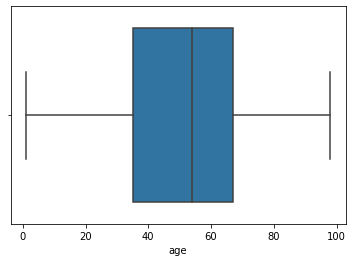

In [18]:
sb.boxplot(x=df['age'])

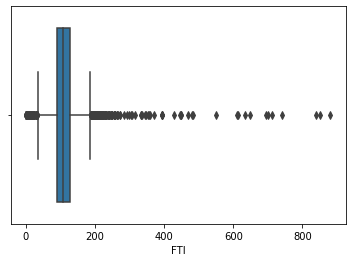

In [19]:
sb.boxplot(x=df['FTI'])

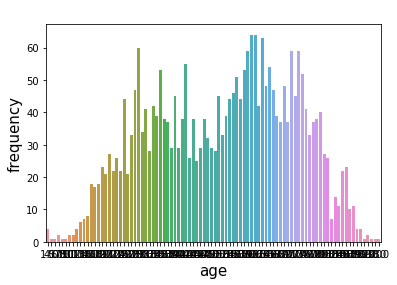

In [20]:
# using box plots to check for outliers
# sb.boxplot(x=outliers.df['age'])

sb.countplot('age',data = df)
plt.xlabel("age",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.title("Frequency of Age",fontsize=16,color="white")
plt.show()

In [0]:
# getting the data types of the columns to +9

## 3.2 **EXPLORATORY DATA ANALYSIS**

### **Univariate Analysis**

#### **STATUS**

In [22]:
# to preview dataset
# 
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [23]:
# distribution of status using subplots
#
 
df['status'].unique()

# the repsonse variable is categorical 
# data type is object
# change dtype to boolian

array(['hypothyroid', 'negative'], dtype=object)

In [0]:
# changing the datatype to boolian
df['status'] = df['status'].astype(bool)


#### **AGE**

In [25]:
df.age.nunique()
# There are 92 unique values 
df.age.unique()

array([72., 15., 24., 77., 85., 64., 20., 42., 69., 75., 53., 59., 68.,
       50., 78., 65., 28., 43., 40., 84., nan, 83., 63., 73., 36., 27.,
       48., 71., 60., 34., 79., 62., 74., 32., 41., 70., 29.,  5., 58.,
       35., 51., 22., 16., 44., 39., 47., 18., 17., 88., 56., 30., 45.,
       66., 52., 54., 80., 33., 38., 92., 67., 46., 13., 89., 61., 49.,
       26., 57., 31., 90., 81., 25., 37., 76., 87., 23., 55., 86., 98.,
       21., 97.,  1.,  6., 14., 82., 11., 19.,  9., 12., 10.,  8.,  7.,
        4., 93.])

In [26]:
# description of the variable
# 
df['age'].describe()

count    2717.000000
mean       51.154214
std        19.294405
min         1.000000
25%        35.000000
50%        54.000000
75%        67.000000
max        98.000000
Name: age, dtype: float64

In [27]:
# maximum  and minimum  age 
# 
print("The maximum value of the Age variable is: ", df['age'].max())
print("The minimum value of the Age variable is:", df['age'].min())

The maximum value of the Age variable is:  98.0
The minimum value of the Age variable is: 1.0


<function matplotlib.pyplot.show>

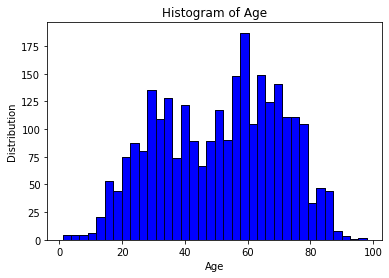

In [28]:
# visualizing the distribution of age 

# matplotlib histogram
plt.hist(df['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sb.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show

# age is almost normally distributed

#### **SEX**

In [29]:
df.sex.nunique()
# there are 2 unique values 

2

In [30]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,True,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,True,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,True,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,True,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,True,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


### **BIVARIATE ANALYSIS**

## 3.2 **FEATURE ENGINEERING**

**LABEL ENCODING**

MOst of the feature variables are categorical in nature hence there will be need for label encoding as ML models only read numerical data

In [31]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column query_on_throxine. 
df['query_on_thyroxine']= label_encoder.fit_transform(df['query_on_thyroxine']) 
  
df['query_on_thyroxine'].unique() 

array([0, 1])

In [32]:
# encode labels in column 'sick'. 
df['sick']= label_encoder.fit_transform(df['sick']) 
  
df['sick'].unique() 

array([0, 1])

In [33]:
# encode labels in column 'on_thyroxine'. 
df['on_thyroxine']= label_encoder.fit_transform(df['on_thyroxine']) 
  
df['on_thyroxine'].unique() 

array([0, 1])

In [34]:
# encode labels in column 'thyroid_surgery'. 
df['thyroid_surgery']= label_encoder.fit_transform(df['thyroid_surgery']) 
  
df['thyroid_surgery'].unique() 

array([0, 1])

In [35]:
# encode labels in column 'query_hypothyroid'. 
df['query_hypothyroid']= label_encoder.fit_transform(df['query_hypothyroid']) 
  
df['query_hypothyroid'].unique() 

array([0, 1])

In [36]:
# encode labels in column 'on_thyroxine'. 
df['thyroid_surgery']= label_encoder.fit_transform(df['thyroid_surgery']) 
  
df['thyroid_surgery'].unique() 

array([0, 1])

In [37]:
# encode labels in column 'pregnancy'. 
df['pregnant']= label_encoder.fit_transform(df['pregnant']) 
  
df['pregnant'].unique() 

array([0, 1])

In [38]:
# encode labels in column 'tumor'. 
df['tumor']= label_encoder.fit_transform(df['tumor']) 
  
df['tumor'].unique() 

array([0, 1])

In [39]:
# encode labels in column 'lithium'. 
df['lithium']= label_encoder.fit_transform(df['lithium']) 
  
df['lithium'].unique() 

array([0, 1])

In [40]:
# encode labels in column 'goitre'. 
df['goitre']= label_encoder.fit_transform(df['goitre']) 

df['goitre'].unique() 

array([0, 1])

In [41]:
# encode labels in column 'on_antithyroid_medication'. 
df['on_antithyroid_medication']= label_encoder.fit_transform(df['on_antithyroid_medication']) 
  
df['on_antithyroid_medication'].unique() 

array([0, 1])

In [42]:
# encode labels in column 'query_hyperthyroid'. 
df['query_hyperthyroid']= label_encoder.fit_transform(df['query_hyperthyroid']) 
  
df['query_hyperthyroid'].unique() 

array([0, 1])

In [43]:
# encoding the response variable
# 

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column query_on_throxine. 
df['status']= label_encoder.fit_transform(df['status']) 
  
df['status'].unique() 

array([0])

In [0]:
# for the gender variable, using pd,get_dummies

df_1 = pd.get_dummies(df, columns= ['sex'])

In [45]:
# create new df with the encoded variables
# 
df_1.head()


,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sex_F,sex_M
0,0,72.0,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN,0,1
1,0,15.0,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN,1,0
2,0,24.0,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN,0,1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN,1,0
4,0,77.0,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN,0,1


In [46]:
# new dataframe 
df_2 = df_1.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured','TBG'], axis = 1)
df_2

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,sex_F,sex_M
0,0,72.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0,1
1,0,15.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,1,0
2,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0,1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,1,0
4,0,77.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0,1,0
3159,0,29.0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0,1,0
3160,0,77.0,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0,0,1
3161,0,74.0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0,1,0


In [47]:
# unique values
df_2.replace(['nan'], 0)

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,sex_F,sex_M
0,0,72.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0,1
1,0,15.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,1,0
2,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0,1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,1,0
4,0,77.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0,1,0
3159,0,29.0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0,1,0
3160,0,77.0,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0,0,1
3161,0,74.0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0,1,0


### CHECKING FOR MULTICOLINEARITY

In [49]:
df_2.columns

Index(['status', 'age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M'],
      dtype='object')

In [50]:
# checking the correlation of the variables
corr = df_2[['status', 'age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M']].corr()
corr 

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,sex_F,sex_M
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.001552,-0.021606,-0.063665,-0.013207,0.051351,-0.091812,-0.164818,0.068590,-0.065635,-0.021321,-0.038627,-0.009155,-0.332307,-0.103116,-0.226361,0.027389,-0.002103,0.009576
on_thyroxine,NaN,-0.001552,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,-0.003311,0.023499,0.219283,0.073641,0.116117,0.129742,-0.121486
query_on_thyroxine,NaN,-0.021606,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-0.019866,-0.021164,-0.020115,-0.034624,-0.004390,-0.046756,0.054593
on_antithyroid_medication,NaN,-0.063665,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-0.001711,0.074606,-0.003296,0.028649,-0.019334,0.024042,-0.018664
thyroid_surgery,NaN,-0.013207,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,0.011656,-0.009696,-0.018275,0.024862,-0.027261,0.039308,-0.038623
query_hypothyroid,NaN,0.051351,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,0.069439,-0.049431,-0.015260,0.036081,-0.047833,0.074057,-0.063703
query_hyperthyroid,NaN,-0.091812,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-0.029907,0.220074,0.164143,0.078444,0.084608,0.062536,-0.057096
pregnant,NaN,-0.164818,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,-0.014915,0.215710,0.172383,0.337944,-0.007425,0.090695,-0.090461
sick,NaN,0.068590,-0.063956,-0.023912,-0.020852,-0.033144,-0.051623,-0.051854,-0.025625,1.000000,-0.020343,-0.004521,-0.032311,-0.007839,-0.102766,-0.042416,-0.048681,-0.023428,-0.016860,0.022396


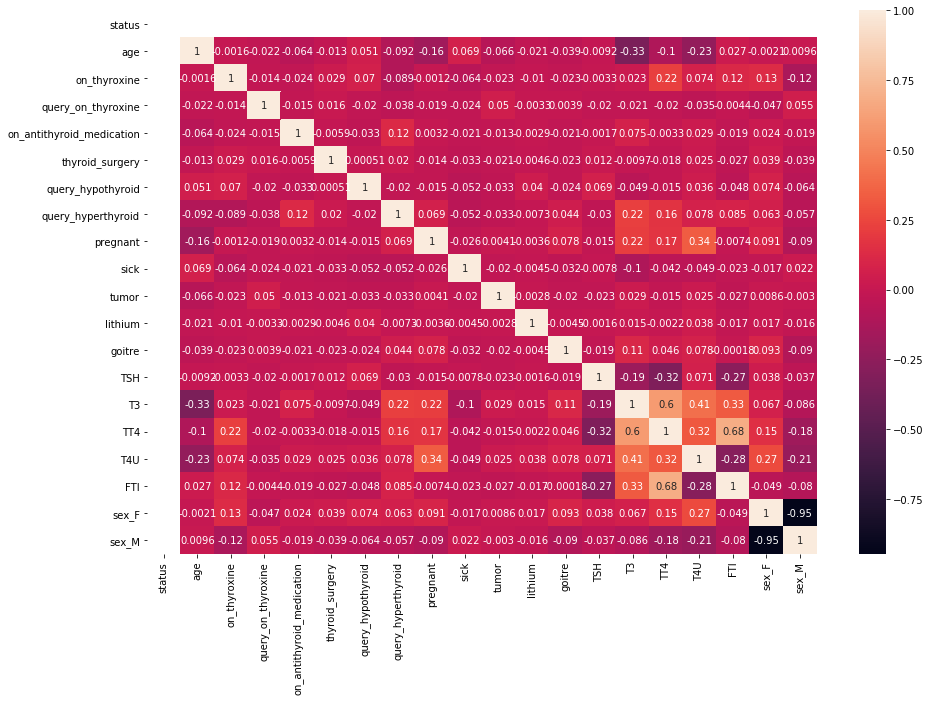

In [51]:
# visualizing the correlation on a heatmap 
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

In [52]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 20 columns):
status                       3163 non-null int64
age                          2717 non-null float64
on_thyroxine                 3163 non-null int64
query_on_thyroxine           3163 non-null int64
on_antithyroid_medication    3163 non-null int64
thyroid_surgery              3163 non-null int64
query_hypothyroid            3163 non-null int64
query_hyperthyroid           3163 non-null int64
pregnant                     3163 non-null int64
sick                         3163 non-null int64
tumor                        3163 non-null int64
lithium                      3163 non-null int64
goitre                       3163 non-null int64
TSH                          2695 non-null float64
T3                           2468 non-null float64
TT4                          2914 non-null float64
T4U                          2915 non-null float64
FTI                          2916 non-null float64

In [0]:
df_2 = df_2[df_2.applymap(np.isreal).any(1)]

# **MODELLING**

### **BASELINE MODEL**

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone tested positive for hypothyrodism, so let's use that column as our Y 
y = df_2['status'].values
X = df_2.drop(['status'], axis = 1).values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: ignored

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['POsitive for Hypothyrodism', 'Negative for Hypothyrodism'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('df_2.png')
Image(graph.create_png())

In [0]:
# Random forest approach
# Import the model
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyrodism_Forest.png')
Image(graph.create_png())

### **SUPPORT VECTOR MACHINE APPROACH**

# **MODEL EVALUATION**

# **DEPLOYMENT**